In [1]:
import pandas as pd
import numpy as np
xls = pd.ExcelFile('SELECTED_FOOD SEP_2019.xlsx')
states = xls.sheet_names
local_rice_Aug_states = []
local_rice_Sep_states = []
for sheet_name in states:
    df = pd.read_excel('SELECTED_FOOD SEP_2019.xlsx', sheet_name=sheet_name)
    local_rice_Aug = df.iloc[23,32]
    local_rice_Sep = df.iloc[23,33]
    local_rice_Aug_states.append(local_rice_Aug)
    local_rice_Sep_states.append(local_rice_Sep)

In [2]:
local_rice_Aug = pd.DataFrame(data=local_rice_Aug_states, index=None, columns =['Aug Local Rice(Naira/Kg)'])
local_rice_Sep = pd.DataFrame(data=local_rice_Sep_states, index=None, columns =['Sept Local Rice(Naira/Kg)'])
local_rice_Aug_Sep = pd.concat([local_rice_Sep, local_rice_Aug],axis=1, ignore_index=True)
local_rice_Aug_Sep['states'] = states
local_rice_Aug_Sep['Aug Local Rice(Naira/Kg)'] = local_rice_Aug
local_rice_Aug_Sep['Sept Local Rice(Naira/Kg)'] = local_rice_Sep
local_rice_Aug_Sep[[ 'states', 'Aug Local Rice(Naira/Kg)', 'Sept Local Rice(Naira/Kg)']]
local_rice_Aug_Sep.drop(index=37, inplace=True)
local_rice_Aug_Sep.drop(local_rice_Aug_Sep.iloc[:,0:2], axis =1, inplace=True)

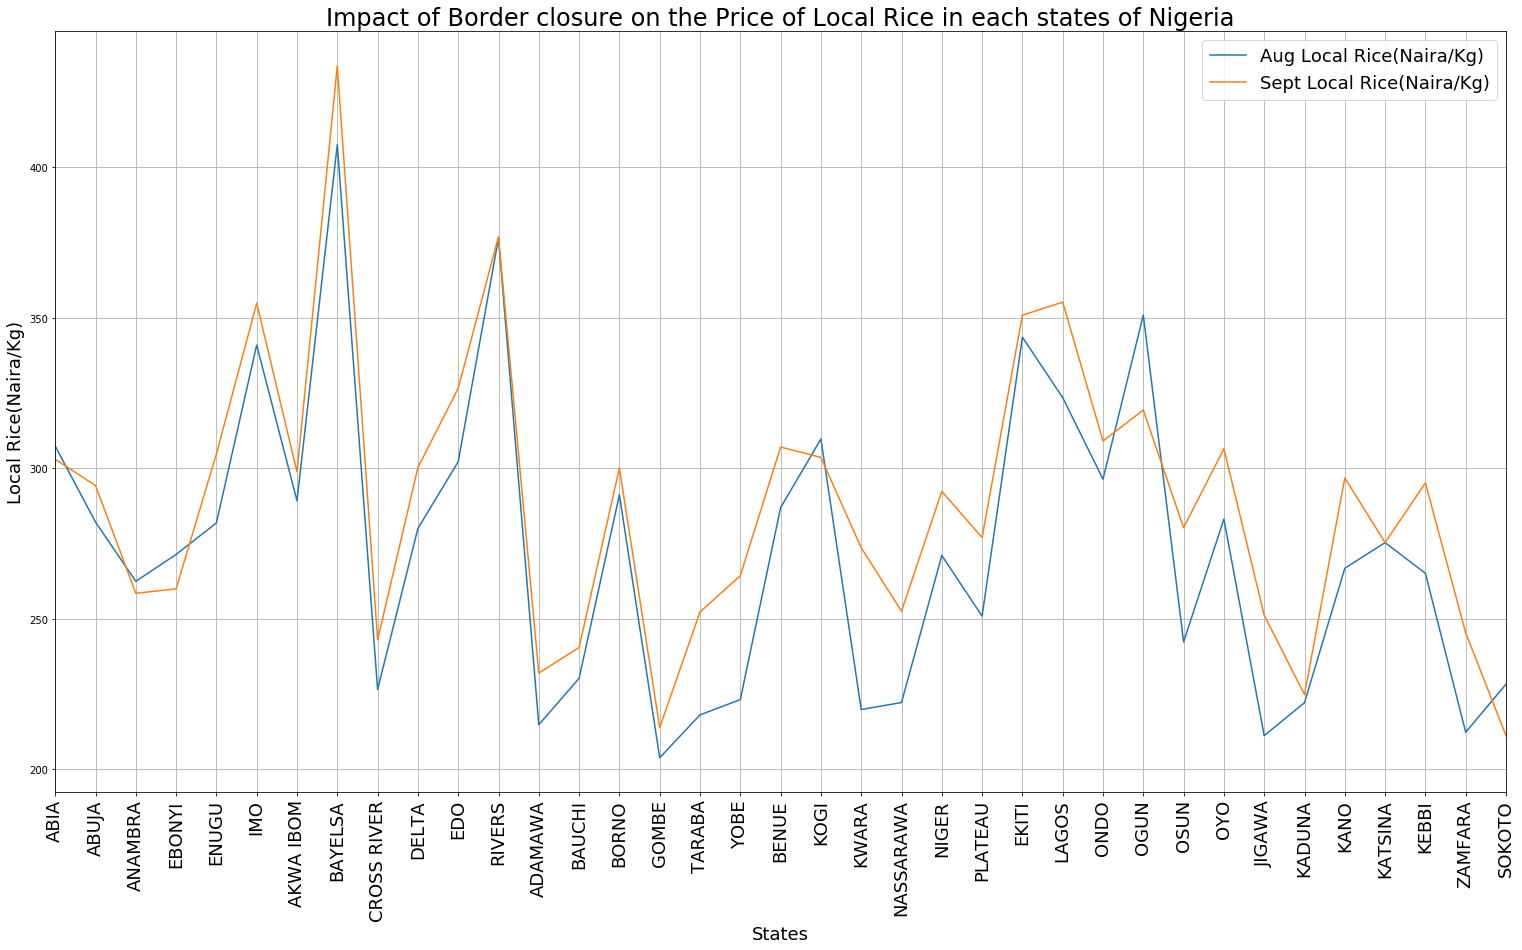

In [4]:
import matplotlib.pyplot as plt
ax = local_rice_Aug_Sep.plot(x='states', y=['Aug Local Rice(Naira/Kg)', 'Sept Local Rice(Naira/Kg)'], kind="line")
ax.set_xticks(local_rice_Aug_Sep.index)
ax.set_xticklabels(local_rice_Aug_Sep['states'], fontsize=18)
plt.ylabel('Local Rice(Naira/Kg)', fontsize=18)
plt.xlabel('States', fontsize=18)
plt.title('Impact of Border closure on the Price of Local Rice in each states of Nigeria', fontsize=24)
ax.legend(fontsize=18)
for item in ax.get_xticklabels():
    item.set_rotation(90)
plt.grid(True)
plt.gcf().set_size_inches(26, 14)
plt.show()